# DL 3 - Question 3
Apply the codeon 20_newsgroup data set we worked in the previous classesfromsklearn.datasets importfetch_20newsgroupsnewsgroups_train =fetch_20newsgroups(subset='train', shuffle=True, categories=categories,)

In [1]:
#Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dropout
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten

In [2]:
#https://www.kaggle.com/arihantjain09/20-groups-best-predictions-and-visuals
categories = ['alt.atheism', 'sci.space']

In [3]:
#loading the data
from sklearn.datasets import fetch_20newsgroups 
newsgroups_train =fetch_20newsgroups(subset='train', shuffle=True, categories=categories)

In [4]:
#Reading the data
sentences = newsgroups_train.data
y = newsgroups_train.target

In [5]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [6]:
#Embedding the layers
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

#getting the vocabulary of data
X_train_voc = tokenizer.texts_to_sequences(X_train)
X_test_voc = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(X_train_voc,maxlen=max_review_len)
paded_test = pad_sequences(X_test_voc,maxlen=max_review_len)

In [12]:
#Building the model.
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len)) 
model.add(Flatten()) #flatten has to be done after embedding
model.add(Dropout(0.2)) #dropping some outliers
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#compilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(padded_train,y_train, epochs=5, verbose=True, validation_data=(paded_test,y_test), batch_size=64)

Epoch 1/5
13/13 [==============================] - 12s 885ms/step - loss: 7.1518 - acc: 0.5299 - val_loss: 1.9391 - val_acc: 0.5948
Epoch 2/5
13/13 [==============================] - 12s 896ms/step - loss: 1.8774 - acc: 0.5174 - val_loss: 1.0928 - val_acc: 0.5948
Epoch 3/5
13/13 [==============================] - 11s 864ms/step - loss: 0.6149 - acc: 0.6878 - val_loss: 0.3957 - val_acc: 0.8439
Epoch 4/5
13/13 [==============================] - 12s 906ms/step - loss: 0.2362 - acc: 0.9192 - val_loss: 0.2677 - val_acc: 0.9442
Epoch 5/5
13/13 [==============================] - 12s 889ms/step - loss: 0.1061 - acc: 0.9876 - val_loss: 0.2169 - val_acc: 0.9368


In [13]:
#Printing the summary and accuarcy of the model
print(model.summary())
print(model.evaluate(paded_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8648, 50)          1148800   
_________________________________________________________________
flatten_1 (Flatten)          (None, 432400)            0         
_________________________________________________________________
dropout (Dropout)            (None, 432400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               129720300 
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 130,869,401
Trainable params: 130,869,401
Non-trainable params: 0
_________________________________________________________________
None
9/9 [==============================] - 1s 92ms/step - loss: 0.2169 - acc: 0.9368
[0.21694432199001312

In [9]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

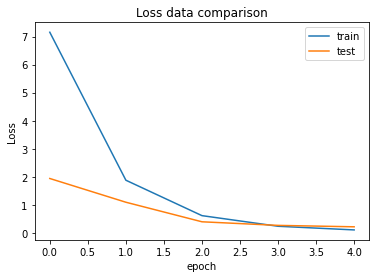

In [14]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations :
1. Loss of the model is around 17%

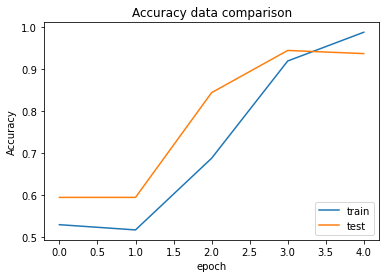

In [15]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations :
1. Accuracy of the model is around 94%